In [ ]:
# მხოლოდ საჭიროების შემთხვევაში
!pip install pandas numpy matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# მონაცემთა დამუშავება Pandas ით


##### მონაცემთა წაკითხვა CSV ფაილებიდან

In [2]:
df = pd.read_csv('stack-overflow-developer-survey-2023/survey_results_public.csv')
df_schema = pd.read_csv('stack-overflow-developer-survey-2023/survey_results_schema.csv')


##### პირველი 50 ჩანაწერიდან ყოველი მე-5 ადამიანის მონაცემები, კერძოდ ასაკი, პროგრამირებასთან შეხების ხანგრძლივობა, ქვეყანა და წლიური შემოსავალი

In [3]:
df.loc[:50:5, ['Age', 'YearsCode', 'Country', 'ConvertedCompYearly']]


,Age,YearsCode,Country,ConvertedCompYearly
0,18-24 years old,NaN,NaN,NaN
5,35-44 years old,21,United Kingdom of Great Britain and Northern I...,96828.0
10,25-34 years old,14,United States of America,NaN
15,35-44 years old,15,Germany,107090.0
20,25-34 years old,6,United Kingdom of Great Britain and Northern I...,60828.0
25,35-44 years old,12,South Africa,103743.0
30,35-44 years old,24,Australia,237974.0
35,35-44 years old,5,United Kingdom of Great Britain and Northern I...,NaN
40,18-24 years old,11,Canada,111527.0
45,25-34 years old,13,Canada,101490.0


##### ბოლო 7 მონაწილის ინფორმაცია AI ს და პროგრამული ენების გამოყენებასთან დაკავშირებით 

In [4]:
df[['AISelect', 'LanguageHaveWorkedWith']].tail(7)


,AISelect,LanguageHaveWorkedWith
89177,"No, but I plan to soon",Bash/Shell (all shells);C#;C++;Cobol;Groovy;PH...
89178,"No, but I plan to soon",JavaScript;TypeScript
89179,Yes,HTML/CSS;Java;JavaScript;SQL;TypeScript
89180,Yes,Dart;Java;Python;SQL
89181,"No, but I plan to soon",Assembly;Bash/Shell (all shells);C;C#;Python;R...
89182,Yes,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...
89183,Yes,C#;Go;JavaScript;SQL;TypeScript


##### ინდექსის ცვლილება 

In [5]:
df.set_index('ResponseId', inplace=True)


##### იმ მომხმარებლების, რომლებიც არიან საქართველოდან და ჰობად აქვთ კოდირება, პასუხები კითხვებზე რომლებიც იწყება "AI" ით

In [6]:
from_georgia_filt = df['Country'] == 'Georgia'
is_coding_hobby = df['CodingActivities'].str.contains('Hobby', na=False)

df.loc[from_georgia_filt & is_coding_hobby, df.columns.str.startswith('AI')]


,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different
ResponseId,,,,,,,,,,,,,,,,
503,NaN,NaN,NaN,NaN,Yes,Unsure,Other (please explain),Somewhat distrust,Testing code,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,ChatGPT,ChatGPT,NaN,NaN,"No, but I plan to soon",Favorable,NaN,Somewhat trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,NaN,NaN,NaN,NaN,"No, but I plan to soon",Favorable,NaN,Neither trust nor distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1674,NaN,NaN,NaN,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4637,NaN,NaN,NaN,NaN,"No, but I plan to soon",Indifferent,NaN,Somewhat distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85311,ChatGPT,ChatGPT,AWS CodeWhisperer,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86065,ChatGPT,ChatGPT,NaN,NaN,Yes,Unfavorable,Increase productivity;Speed up learning,Somewhat distrust,Documenting code;Debugging and getting help;Te...,Learning about a codebase;Writing code,Project planning;Committing and reviewing code...,NaN,NaN,Learning about a codebase,Writing code,NaN
87401,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot,Yes,Favorable,Increase productivity;Greater efficiency,Somewhat trust,Learning about a codebase;Project planning;Wri...,Writing code;Documenting code;Committing and r...,Deployment and monitoring;Collaborating with t...,Writing code,Committing and reviewing code,NaN,NaN,Documenting code


##### მონაცემების დალაგება ქვეყნის ზრდადობით და სამუშაო გამოცდილებით კლებადობით მიხედვით

In [7]:
df.sort_values(['Country', 'WorkExp'], ascending=[True, False], na_position='first', inplace=False)[['Country', 'WorkExp']]


,Country,WorkExp
ResponseId,,
1,NaN,NaN
71,NaN,NaN
305,NaN,NaN
734,NaN,NaN
876,NaN,NaN
...,...,...
88574,Zimbabwe,5.0
10142,Zimbabwe,4.0
39178,Zimbabwe,4.0


##### სამუშაო გამოცდილების სტატისტიკური მონაცემები

In [8]:
print(f"""
{df['WorkExp'].min() = }
{df['WorkExp'].median() = }
{df['WorkExp'].max() = }

{df['WorkExp'].mean() = }
{df['WorkExp'].std() = }
""")



df['WorkExp'].min() = 0.0
df['WorkExp'].median() = 9.0
df['WorkExp'].max() = 50.0

df['WorkExp'].mean() = 11.405126322311204
df['WorkExp'].std() = 9.051989418487764



# მონაცემთა ვიზუალიზაცია Matplotlib ით


##### სვეტოვანი დიაგრამა AI ის გამოყენების შესახებ კოდის წერისას

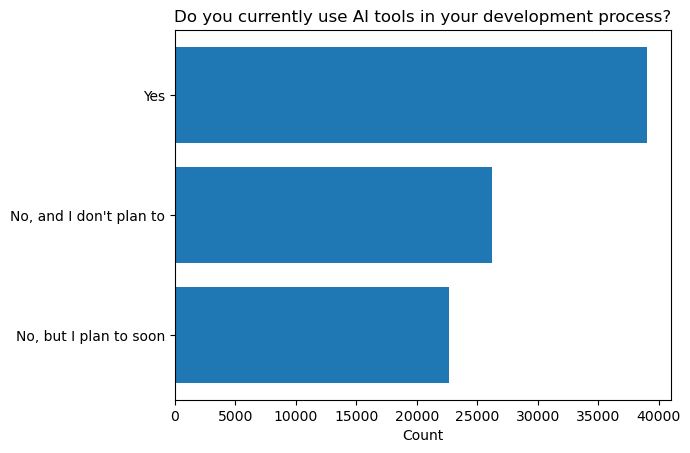

In [9]:
fig, ax = plt.subplots()

# Example data
answer_labels = df['AISelect'].value_counts().keys()
y_pos = np.arange(len(answer_labels))
answer_value_counts = df['AISelect'].value_counts().values

ax.barh(y_pos, answer_value_counts, align='center')
ax.set_yticks(y_pos, labels=answer_labels)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('Do you currently use AI tools in your development process?')

plt.show()


##### წრიული დიაგრამა ხშირად გამოყენებადი პროგრამული ენების შესახებ

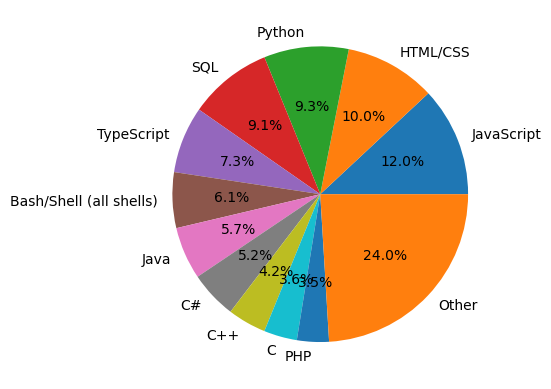

In [10]:
df_2 = df.copy()

df_2['LanguageHaveWorkedWith'] = df_2['LanguageHaveWorkedWith'].str.split(';')
df_2 = df_2.explode('LanguageHaveWorkedWith')

language_counts = df_2['LanguageHaveWorkedWith'].value_counts().reset_index()

others_filt = language_counts['count'] < language_counts['count'].max() * .25
others_count = language_counts.loc[others_filt]['count'].sum()
language_counts = language_counts.drop(index=language_counts.loc[others_filt].index)
language_counts.loc[len(language_counts)] = {'LanguageHaveWorkedWith': 'Other', 'count': others_count}

labels = language_counts['LanguageHaveWorkedWith']
sizes = language_counts['count']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()
